# -----
# APA
# -----

### Written Sources:
- Athey, S. & Imbens, G. (2019). Machine Learning Methods Economists Should Know About. Draft version March 2019, arXiv:1903.10075, 1-47.
- Athey, S. & Wager, S. (2018). Efficient Policy Learning. Draft version December 2018, arXiv:1702.02896, 1-37.
- Chernozhukov, V. et al. (2016). Double machine learning for treatment and causal parameters. Working Paper 2016, http://hdl.handle.net/10419/149795, 1-30.
- Ding, P. & Li, F. (2018). Causal Inference: A Missing Data Perspective. Statistical Science. Volume 33, Number 2 (2018), 214-237.
- Farrell, M., Liang, T., and Misra S. (2018). Deep Neural Networks for Estimation and Inference: Application to Causal Effects and Other Semiparametric Estimands. Draft version December 2018, arXiv:1809.09953, 1-54.
- Hitsch, G J. & Misra, S. (2018). Heterogeneous Treatment Effects and Optimal Targeting Policy Evaluation. January 28, 2018, Available at SSRN: https://ssrn.com/abstract=3111957 or http://dx.doi.org/10.2139/ssrn.3111957
- King, G., & Nielsen, R. (2019). Why Propensity Scores Should Not Be Used for Matching. Political Analysis. Draft version November 2018, 1-33. Copy at http://j.mp/2ovYGsW
- Lee, B. K., Lessler, J., & Stuart, E. A. (2010). Improving propensity score weighting using machine learning. Statistics in medicine, 29(3), 337–346. doi:10.1002/sim.3782
- Li, F. & Li, F. (2019). Propensity Score Weighting for Causal Inference with Multi-valued Treatments. Draft version March 2019, arXiv:1808.05339, 1-34.
- Li F., Morgan, K L & Zaslavsky, A M. (2018) Balancing Covariates via Propensity Score Weighting. Journal of the American Statistical Association, 113:521, 390-400, DOI: 10.1080/01621459.2016.1260466
- Dehejia, R H., & Wahba, S. (2002) Propensity Score-Matching Methods for Nonexperimental Causal Studies. Review of Economics and Statistics, 84 (1), February 2002, 151-161
- Rosenbaum, P. & Rubin, D. (1983). The central role of the propensity score in observational studies for causal effects. Biometrika, 70, 41-55.

# Presentation Notes

### Structure:
- Project Definition
- Conceptual Review
- Experimental Design
- Experiemental Process
- Results
- Recap
- Next Steps

### The goal:
- To correct for individually different probabilities to be treated within a testing situation.
         - Businesses are able to assign treatment at random s.t. effect is differemce in means
         - Reluctance because of:
             - the lost potential profits from customers in a known higher profit probability class
             - The costs of tests
         - Machine learning a perfect match based on lack of need for causative explanations

- Example: Catalogue Mailings - Hitsch & Misra (2018)
        - Strategy was profitable for all receipients over a certain prior spending (cost/margin of treatment)
        - Testing would necesitate some of these individuals not being treated
        - Some at higher levels do not need treatment
        - Strategies that target individuals with a higher treatment effect ib=ncrease expected returns
     
- Instead: Actively bias the experimental design towards the treatment of more profitable customers
        - Still random, but more likely that those who we want to treat will be
        - No participants at 0 or 1 (XYZ Actual levels here)
        - Treatment assignment would be biased, so correct with inverse propensity weighting

### Propensity Scores:
- "An inclination or natural tendency to behave in a particular way."

        P(x) = Pr(T=1 | X=x)
        
        Lack of confoundedness (self selection of various degrees): Y(0), Y(1) ⊥ T | x
        
        Standard stable unit treatment value assumption: SUTVA
        
        Issue: observability leading to latent bias, extreme value bias

- Estimating the effect of a treatment by accounting for the covariates to decrease in-sample data bias (can include sampling weights)
        - Effects of smoking
        - Benefits of higher education
        - Job training
        - Reviews (MNAR)
        
        - Issues: of feasibility and ethics (medical trials)

### Matching:
- Commen technique: propensity matching
        - Used to overcome high-dimenstionality
        - Make treatment group and covariates independent (orthoganolaity)
        - Not exact covariate values, but a similar expectation in distribution 
        - Issue of regression to the mean
        
- Malhanobis (1) or Euclidean distance: attempt to mimic blocked randomised trials for precise treatment effect estimates
        - (1) Distributional distance (unitless/scale invariant)
        - Similar covariate values are also valued beyond just propensity score similarity
        - Common practice: scale covariate importance (subjectivity)

# Design:
- Question of current model effectiveness:
    1. Response model is good - we’re going to lose money if we deviate
    2. Model is bad - whatever we do will save us money


- Supervised randomization where true covariate treatment effect is known
- Performance based on profitability analysis
- Response adaptive trial - a "chance" to be treated (as opposed to 50/50 or 80/20)


- Ultimate question: how much profit over an AB test, and is it worth a loss in efficiency?

# Steps:
- 1. Simulate data
    - Setting: catalogue modeling
               - response: amount spent
               - variables: time on platform, prior spending in amount and instance, interactions with products
               - decide on typical error costs for evaluation in real money terms
    - known treatment effect
    - some relationship of X with y plus noise


- 2. Assume there exists some uplift model (can be a manual functions that puts noise on the true values) 
    - A) estimate treatment effects/retrain model
    - B) evaluate the current model/targeting policy 


- 3. Do A/B testing to estimate treatment effect
    - Assign randomly
    - Evaluate Cost and Accuracy


- 4. Compare standard A/B test to our method:
        a) iso-expected cost (/risk) > expected deviation from true effect (empirically estimated by running multiple times)
        b) iso-accuracy > estimate cost for same expected accuracy
        

- Notes from Johannes:
    - Think about how to map uplift scores/treatment effects to treatment propensity. It makes sense to control the expected ratio of targeting. 

    - Discuss how model the treatment effect. It must depend on X. How is it included in the data generating process? 

### Recap:
- 

### Next steps:
- Testing further models:
        - Causal Forest
            - 
        - Double machine learning
            - 
            
            
- Other propensity score assignment methods:
        - Balancing weights (Li et. al 2018)
        - Overlap weights:
            - Each weight is preportional to the probability of being assigned to the other group
            - Bounded between 0 and 1, and reduces asymptotic variance
            - h(x) = e(x)(1-e(x))

# -------
# Code
# -------

### Setup:
Generate usage data. Need users who didn't use platform - decreasing exponential, those who did in a short time, those who are infrequent. Total spent, total spent in last month...

2/3 receive catalogue

Matching realistic distributions - correlation between columns.

In [66]:
from math import exp, log

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from scipy.special import expit
from numpy.random import choice

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV

import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext ipycache

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.figsize'] = 20, 10

np.seterr(divide='ignore', invalid='ignore')
np.random.seed(42)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

The ipycache extension is already loaded. To reload it, use:
  %reload_ext ipycache


In [50]:
# %%cache pickled_thing.pkl variable

In [51]:
def head_shape(df):
    display(df.head())
    display(df.shape)

In [52]:
def conditional_col_remover(df, col):
    if str(col) in list(df.columns):
        df.drop(str(col), axis=1, inplace=True)
        display(df.shape[1])

# Data Generation:

In [96]:
N = 10000
sexes = np.random.randint(0, 2, size=N)  # sex == 1 of male

email_subscription = np.random.choice([0,1], N, p=[0.3, 0.7]) # whether or not they subscribe to online material

member_since = np.random.geometric(p=0.15, size=N) # How many months the person has had an account

total_purchase_dist = stats.gamma(20, scale=3)
total_purchase = total_purchase_dist.rvs(size=N) # number of purchases
total_purchase = [np.round(purchase,0) for purchase in total_purchase]

total_spent_dist = stats.gamma(30, scale=40)
total_spent = total_spent_dist.rvs(size=N) # total spent over all purchases

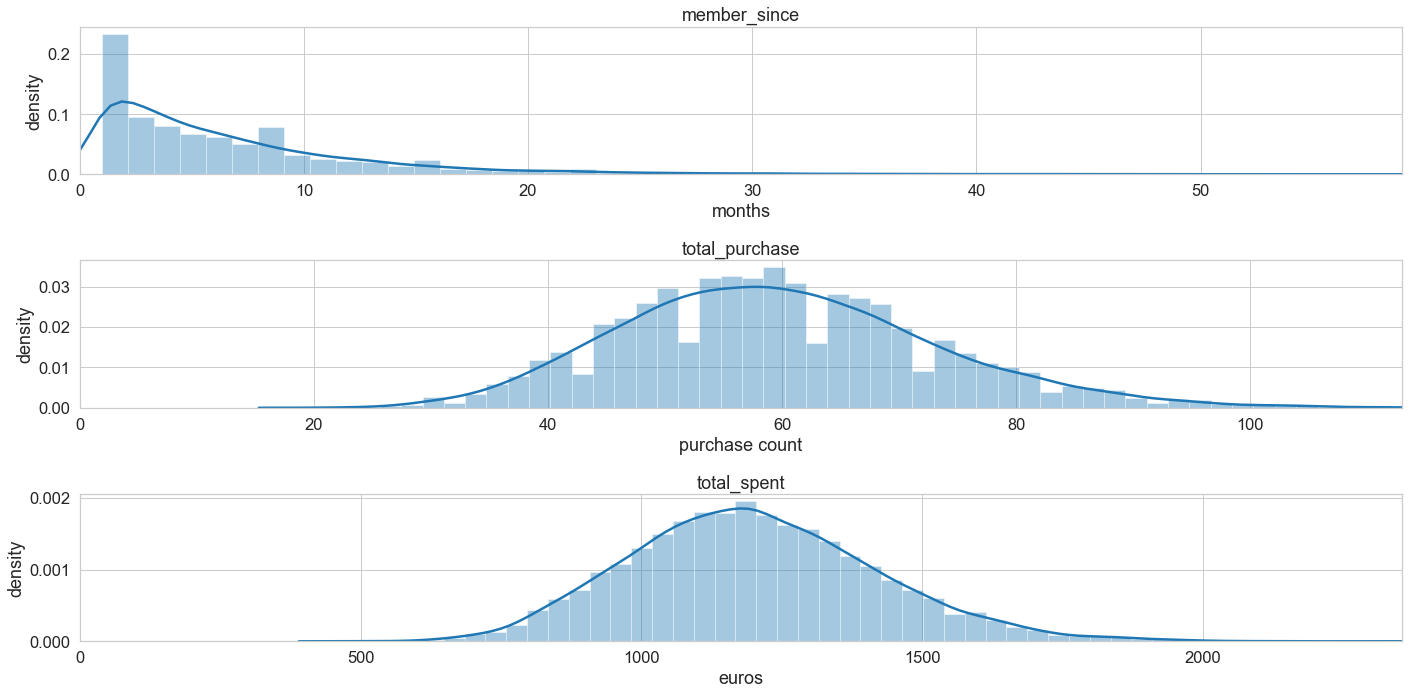

In [97]:
f, (ax1, ax2, ax3) = plt.subplots(3)

ax1.set_title('member_since')
ax1.set_xlabel('months')
ax1.set_ylabel('density')
ax1.set_xlim(0, np.max(member_since))

ax2.set_title('total_purchase')
ax2.set_xlabel('purchase count')
ax2.set_ylabel('density')
ax2.set_xlim(0, np.max(total_purchase))

ax3.set_title('total_spent')
ax3.set_xlabel('euros')
ax3.set_ylabel('density')
ax3.set_xlim(0, np.max(total_spent))

sns.distplot(member_since, ax=ax1)
sns.distplot(total_purchase, ax=ax2)
sns.distplot(total_spent, ax=ax3)
plt.tight_layout();

In [122]:
catalgue_sent = np.random.choice([0,1], N, p=[1/3, 2/3])

In [123]:
trial = np.random.randint(0, 2, size=N) # Assigning a randomized trial

In [124]:
constant = np.ones(N)
df_rnd = pd.DataFrame(dict(sex=sexes, email_subscription=email_subscription, member_since=member_since, 
                           total_purchase=total_purchase, total_spent=total_spent, catalgue_sent=catalgue, constant=const))

columns = ['sex', 'email_subscription', 'member_since', 'total_purchase', 'total_spent', 'catalgue_sent', 'constant']
df_rnd = df_rnd[columns]

post_spent_dist = stats.gamma(10, scale=15)
post_spent = post_spent_dist.rvs(size=N) # total spent after catalogue

df_rnd['post_cat_purchase'] = post_spent

df_rnd.head()

,sex,email_subscription,member_since,total_purchase,total_spent,catalgue_sent,constant,post_cat_purchase
0,1,0,20,45.0,932.440766,1,1.0,172.244209
1,1,1,3,52.0,1305.291401,0,1.0,189.983180
2,1,1,6,60.0,954.321407,0,1.0,121.994220
3,1,1,4,69.0,1258.771916,0,1.0,145.032598
4,1,0,3,43.0,1192.533721,0,1.0,118.468242


In [125]:
df_rnd.describe()

,sex,email_subscription,member_since,total_purchase,total_spent,catalgue_sent,constant,post_cat_purchase
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000
mean,0.493700,0.697600,6.615900,59.727400,1199.933081,0.503200,1.0,149.795563
std,0.499985,0.459321,6.069288,13.325414,219.454837,0.500015,0.0,47.549573
min,0.000000,0.000000,1.000000,22.000000,499.547693,0.000000,1.0,24.119250
25%,0.000000,0.000000,2.000000,50.000000,1047.045955,0.000000,1.0,115.889774
50%,0.000000,1.000000,5.000000,59.000000,1188.354331,1.000000,1.0,144.181308
75%,1.000000,1.000000,9.000000,68.000000,1340.589159,1.000000,1.0,178.542383
max,1.000000,1.000000,59.000000,113.000000,2355.061883,1.000000,1.0,372.291813


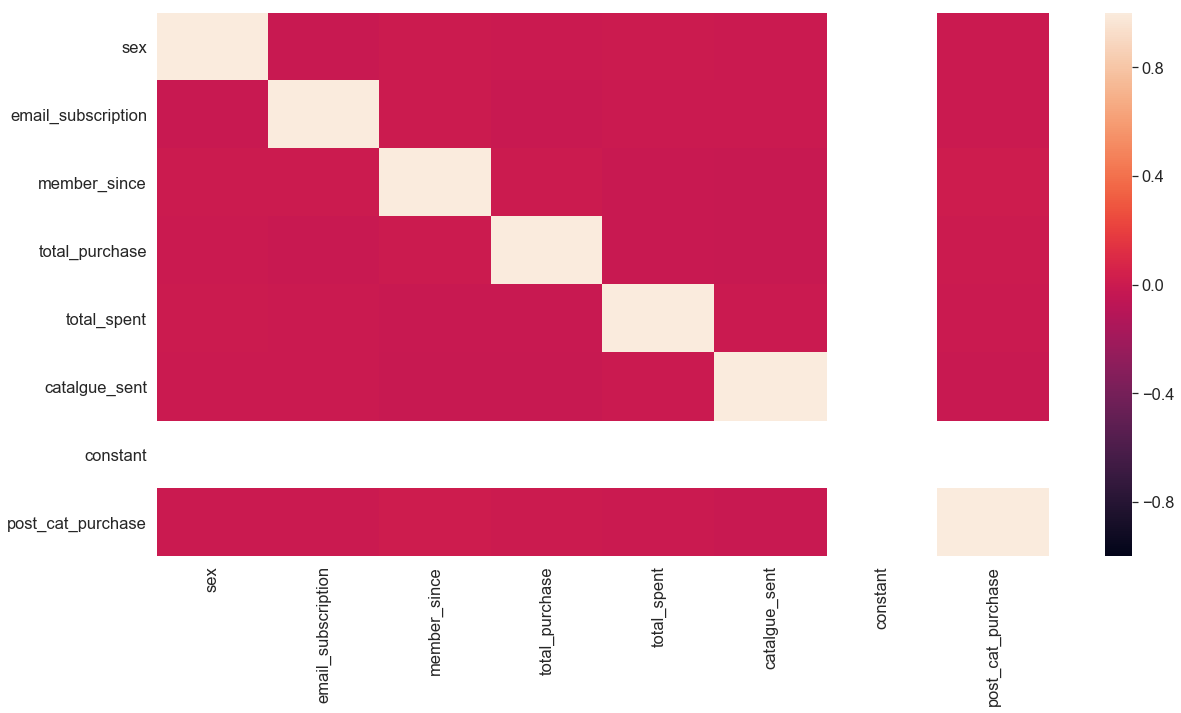

In [126]:
sns.heatmap(df_rnd.corr(), vmin=-1, vmax=1);

In [127]:
# RF for individual effects of treatment on the customers
reg = RandomForestRegressor()
X = df_rnd[features].as_matrix()
y = df_rnd['post_cat_purchase'].values
reg.fit(X, y)

/Users/andrew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/andrew/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [128]:
X_not = np.copy(X)
# Catalogue not sent:
X_not[:, df_rnd.columns.get_loc('catalgue_sent')] = 0

X_was = np.copy(X)
# Cataloge was sent:
X_was[:, df_rnd.columns.get_loc('catalgue_sent')] = 1

preds_rnd = reg.predict(X_was) / reg.predict(X_not)

/Users/andrew/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


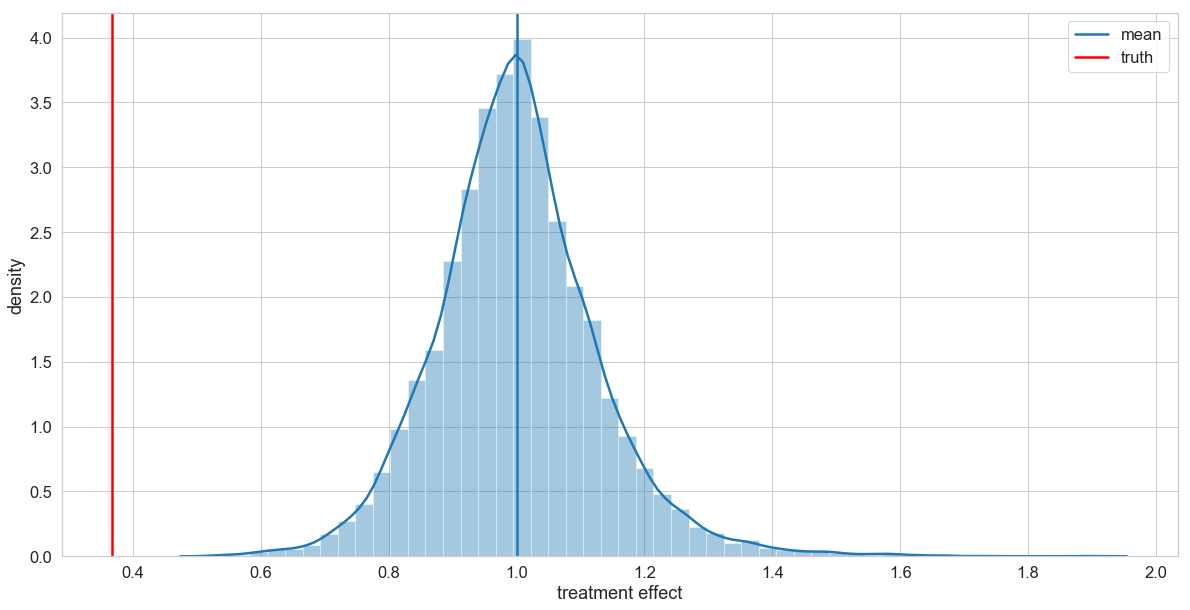

In [129]:
ax = sns.distplot(preds_rnd)
ax.set_xlabel('treatment effect')
ax.set_ylabel('density')
plt.axvline(np.mean(preds_rnd), label='mean')
plt.axvline(np.exp(-1), color='r', label='truth')
plt.legend();

### Code Sources:
- https://florianwilhelm.info/2017/04/causal_inference_propensity_score/
- https://nbviewer.jupyter.org/github/kellieotto/StatMoments/blob/master/PSM_complete.ipynb
- http://www.degeneratestate.org/posts/2018/Mar/24/causal-inference-with-python-part-1-potential-outcomes/